<a href="https://colab.research.google.com/github/christianfilux/Trabajo_final/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as scy

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Preprocesar label
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

import matplotlib #.pyplot as plt1
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_excel('sample_data/DataInferenciaIngresos.xlsx')
df.head()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres
0,54,34,20.6,11,1,42
1,20,0,10.8,0,1,21
2,33,8,13.8,10,1,27
3,54,19,73.8,36,2,148
4,37,2,12.2,9,2,24


In [ ]:
df.shape

(6400, 6)

In [ ]:
df.isnull().sum()

edad              0
AniosDireccion    0
Gastocoche        0
Aniosempleo       0
Aniosresiden      0
ingres            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            6400 non-null   int64  
 1   AniosDireccion  6400 non-null   int64  
 2   Gastocoche      6400 non-null   float64
 3   Aniosempleo     6400 non-null   int64  
 4   Aniosresiden    6400 non-null   int64  
 5   ingres          6400 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 300.1 KB


In [ ]:
df.describe()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,42.058594,11.559844,30.128375,10.566250,2.349687,69.474844
std,12.289516,9.938136,21.926917,9.724458,1.468287,78.718564
min,18.000000,0.000000,4.200000,0.000000,1.000000,9.000000
25%,33.000000,3.000000,13.900000,3.000000,1.000000,28.000000
50%,41.000000,9.000000,22.200000,8.000000,2.000000,45.000000
75%,51.000000,17.000000,39.500000,16.000000,3.000000,79.000000
max,77.000000,56.000000,99.900000,57.000000,9.000000,1116.000000


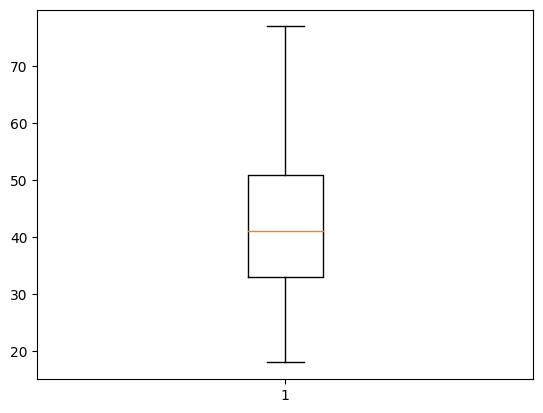

In [ ]:
plt.boxplot(df['edad'])
plt.show()

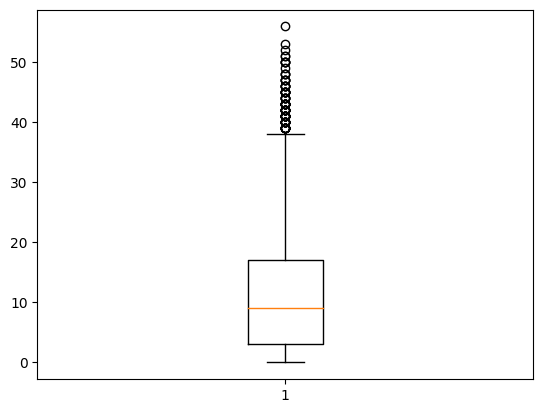

In [ ]:
plt.boxplot(df['AniosDireccion'])
plt.show()

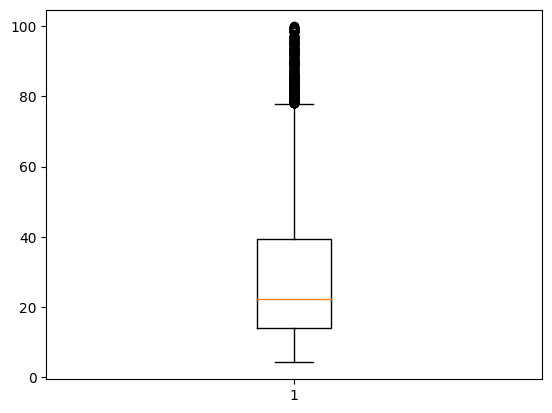

In [ ]:
plt.boxplot(df['Gastocoche'])
plt.show()

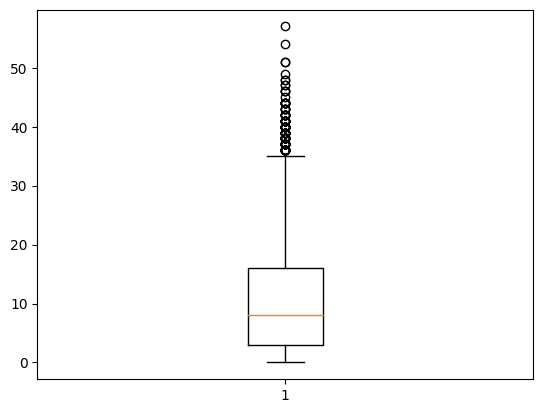

In [ ]:
plt.boxplot(df['Aniosempleo'])
plt.show()

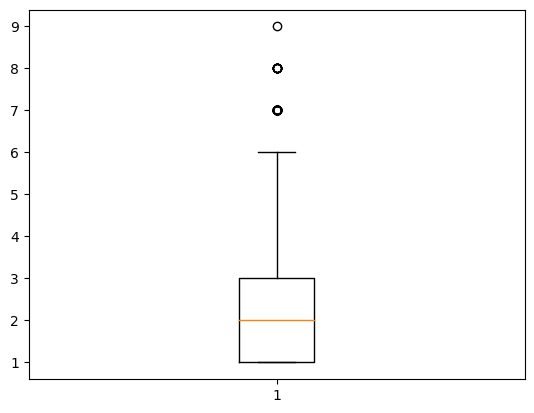

In [ ]:
plt.boxplot(df['Aniosresiden'])
plt.show()

<Axes: >

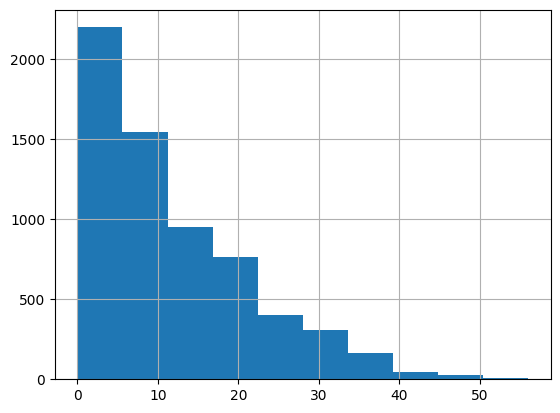

In [ ]:
df['AniosDireccion'].hist()

<Axes: >

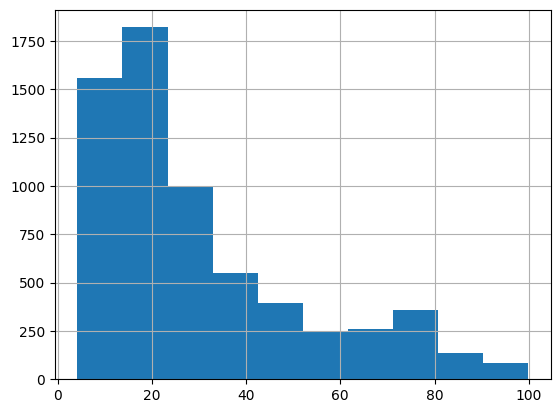

In [ ]:
df['Gastocoche'].hist()

<Axes: >

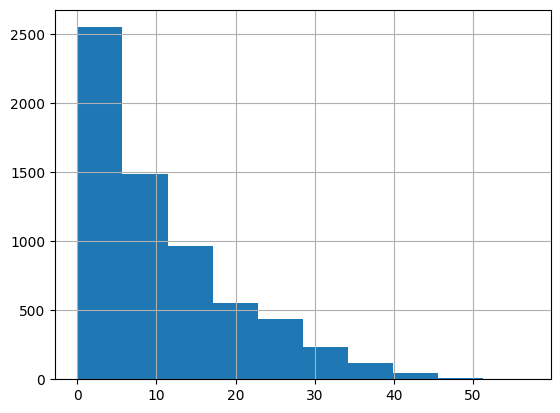

In [ ]:
df['Aniosempleo'].hist()

<Axes: >

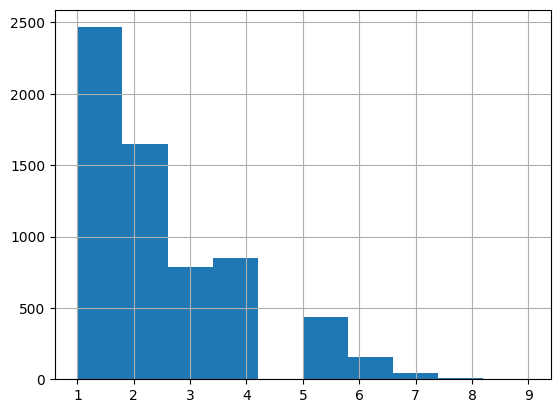

In [ ]:
df['Aniosresiden'].hist()

In [ ]:
q1 = np.percentile(df['Aniosempleo'], 25)
q3 = np.percentile(df['Aniosempleo'], 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = [x for x in df['Aniosempleo'] if (x >= lower_bound) and (x <= upper_bound)]

print(min(filtered_data),max(filtered_data))

0 35


In [ ]:
upper_bound = np.percentile(df['Aniosempleo'], 99)

filtered_data = [x for x in df['Aniosempleo'] if (x >= upper_bound)]

print(min(filtered_data),max(filtered_data))

39 57


array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'AniosDireccion'}>],
       [<Axes: title={'center': 'Gastocoche'}>,
        <Axes: title={'center': 'Aniosempleo'}>],
       [<Axes: title={'center': 'Aniosresiden'}>,
        <Axes: title={'center': 'ingres'}>]], dtype=object)

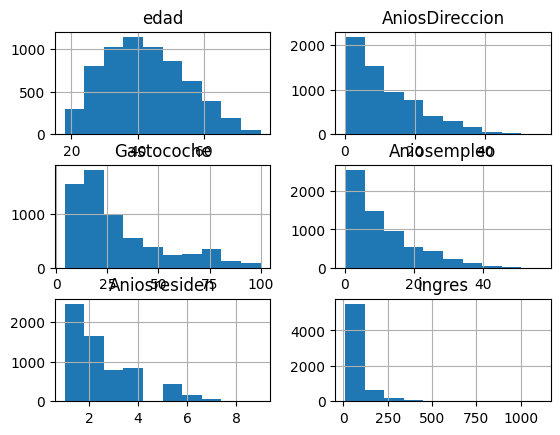

In [ ]:
df.hist()

[[1.         0.33520039]
 [0.33520039 1.        ]]


<Figure size 600x400 with 0 Axes>

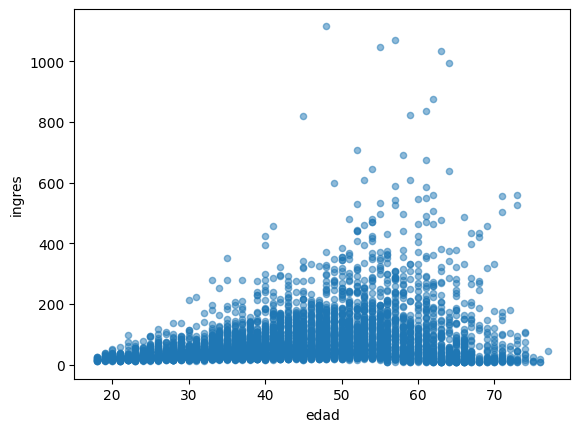

[[1.        0.2156377]
 [0.2156377 1.       ]]


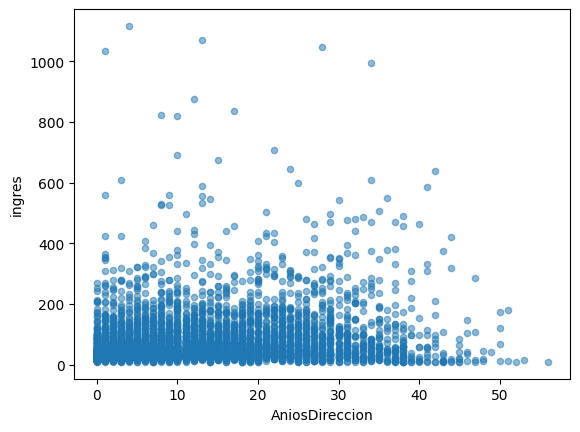

[[1.         0.79214154]
 [0.79214154 1.        ]]


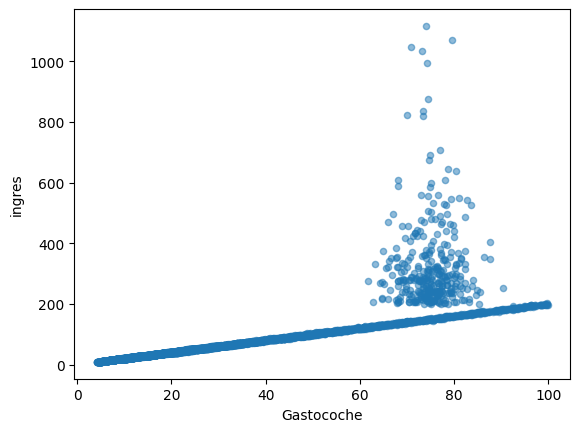

[[1.         0.57918616]
 [0.57918616 1.        ]]


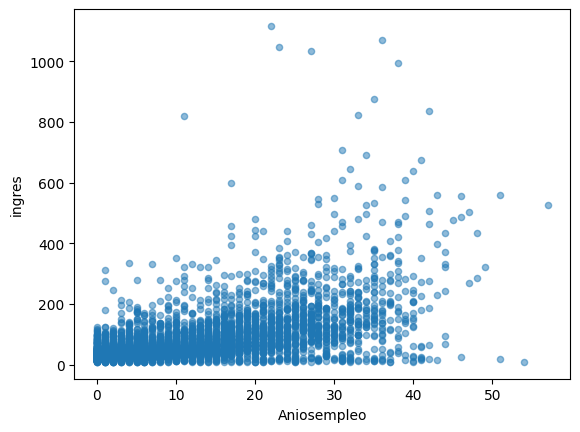

[[ 1.         -0.06627543]
 [-0.06627543  1.        ]]


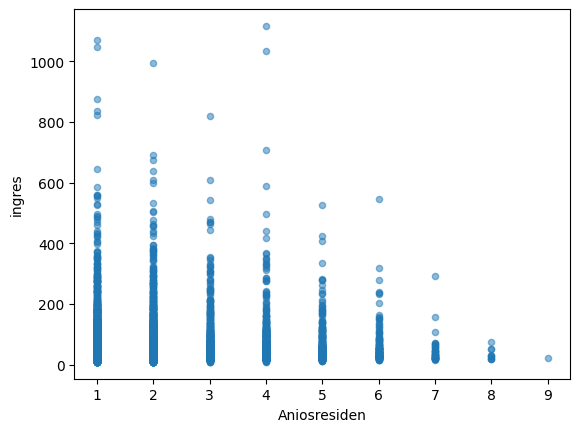

[[1. 1.]
 [1. 1.]]


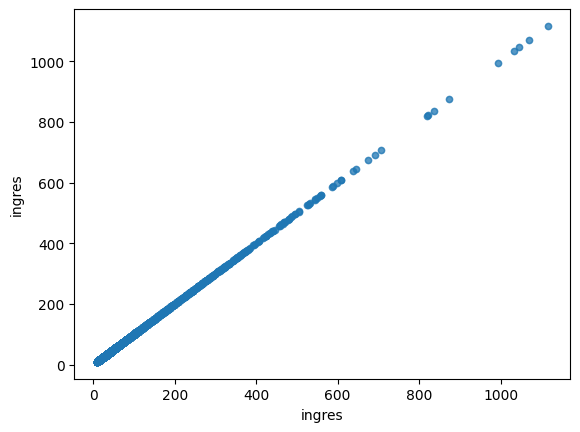

In [ ]:
# Diagrama de dispersión cada variable con la variable objetivo (ingres):
import numpy as np

lista_cuantitativas = list(df.describe().columns)

plt.figure(figsize=(6,4))

for var in lista_cuantitativas:

    print(np.corrcoef(df['ingres'], df[var]))
    data = pd.concat([df['ingres'], df[var]], axis=1)
    data.plot.scatter(x=var, y='ingres', alpha = 0.5)
    plt.show()


In [ ]:
df.describe()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,42.058594,11.559844,30.128375,10.566250,2.349687,69.474844
std,12.289516,9.938136,21.926917,9.724458,1.468287,78.718564
min,18.000000,0.000000,4.200000,0.000000,1.000000,9.000000
25%,33.000000,3.000000,13.900000,3.000000,1.000000,28.000000
50%,41.000000,9.000000,22.200000,8.000000,2.000000,45.000000
75%,51.000000,17.000000,39.500000,16.000000,3.000000,79.000000
max,77.000000,56.000000,99.900000,57.000000,9.000000,1116.000000


In [ ]:
df['ingres_escalado']=(df['ingres']-df['ingres'].mean())/df['ingres'].var()**0.5

In [ ]:
9**0.5

3.0

In [ ]:
df['ingres'].var()**0.5

78.7185637275675

In [ ]:
## Mayor a 3.6 es considerado un outlier
df['ingres_escalado'].quantile([0.9,0.91,0.95,0.98,.99,1])#.describe()

0.90     0.934026
0.91     1.035654
0.95     1.721642
0.98     3.017397
0.99     4.009285
1.00    13.294515
Name: ingres_escalado, dtype: float64

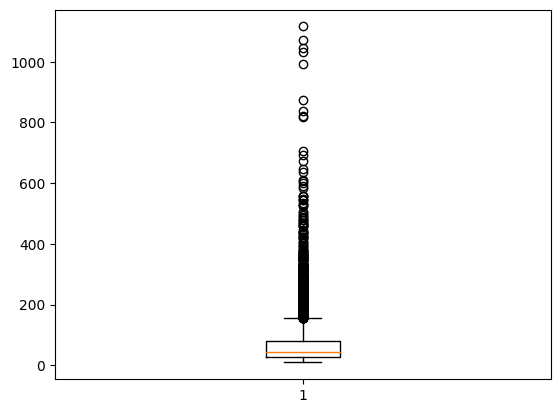

In [ ]:
plt.boxplot(df['ingres'])
plt.show()

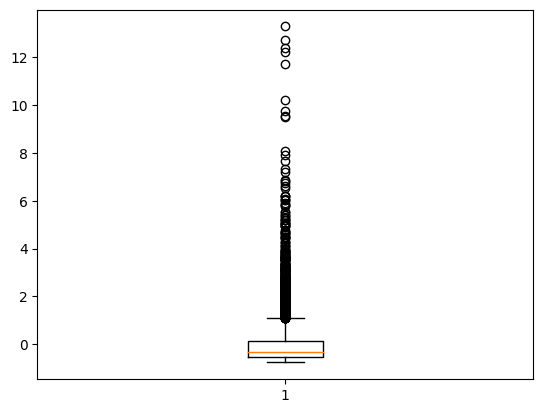

In [ ]:
plt.boxplot(df['ingres_escalado'])
plt.show()

<Axes: xlabel='ingres', ylabel='Count'>

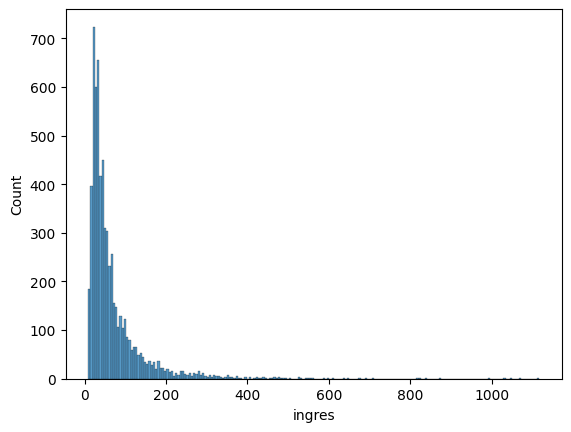

In [ ]:
sns.histplot(df['ingres'])

<Axes: xlabel='AniosDireccion', ylabel='Count'>

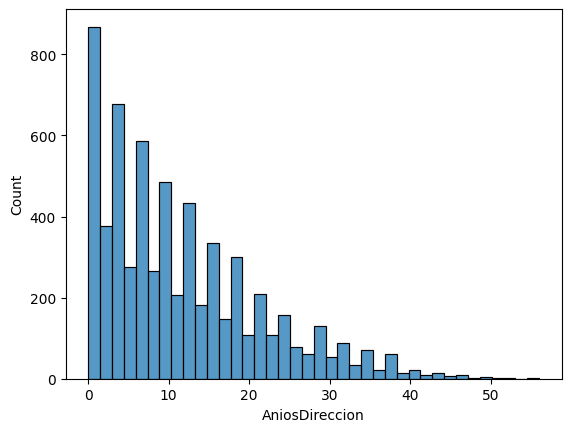

In [ ]:
sns.histplot(df['AniosDireccion'])

In [ ]:
# Aplicar una transformación logarítmica a la columna 'y'
df['ingres_1'] = np.log(df['ingres'])

In [ ]:
df.describe()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres,ingres_escalado,ingres_1
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6.400000e+03,6400.000000
mean,42.058594,11.559844,30.128375,10.566250,2.349687,69.474844,-5.884182e-17,3.894365
std,12.289516,9.938136,21.926917,9.724458,1.468287,78.718564,1.000000e+00,0.774801
min,18.000000,0.000000,4.200000,0.000000,1.000000,9.000000,-7.682412e-01,2.197225
25%,33.000000,3.000000,13.900000,3.000000,1.000000,28.000000,-5.268750e-01,3.332205
50%,41.000000,9.000000,22.200000,8.000000,2.000000,45.000000,-3.109158e-01,3.806662
75%,51.000000,17.000000,39.500000,16.000000,3.000000,79.000000,1.210027e-01,4.369448
max,77.000000,56.000000,99.900000,57.000000,9.000000,1116.000000,1.329452e+01,7.017506


In [ ]:
p1 = np.percentile(df['ingres'], 1)
p98 = np.percentile(df['ingres'], 98)
print(p1,p98)

11.0 307.0


In [ ]:
df['ingres_1'] = np.clip(df['ingres'], p1, (p98 + np.log(df['ingres'])))

<Axes: xlabel='ingres_1', ylabel='Count'>

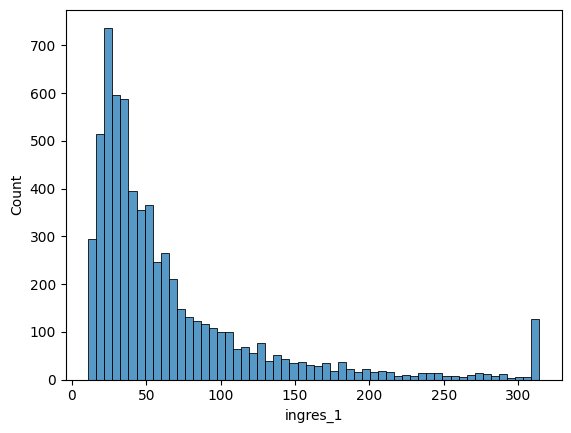

In [ ]:
sns.histplot(df['ingres_1'])

In [ ]:
df = df.drop(['ingres_escalado'], axis=1)
df.head()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres
0,54,34,20.6,11,1,42
1,20,0,10.8,0,1,21
2,33,8,13.8,10,1,27
3,54,19,73.8,36,2,148
4,37,2,12.2,9,2,24


In [ ]:
df = df.drop(['ingres_1'], axis=1)
df.head()

,edad,AniosDireccion,Gastocoche,Aniosempleo,Aniosresiden,ingres,ingres_escalado
0,54,34,20.6,11,1,42,-0.349026
1,20,0,10.8,0,1,21,-0.615799
2,33,8,13.8,10,1,27,-0.539578
3,54,19,73.8,36,2,148,0.997543
4,37,2,12.2,9,2,24,-0.577689


 q3 + 1.5 * iqr : 155.5
Punto más extremo superior de la caja de bigotes: 156


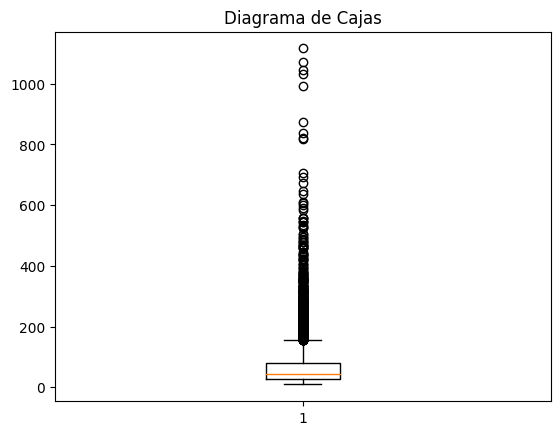

In [ ]:
q1, q3 = np.percentile(df['ingres'], [25, 75])

iqr = q3 - q1

# Calcula los límites para los valores atípicos
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Encuentra el punto más extremo del driagrama de caja
whisker_end = np.min(df['ingres'][df['ingres'] > upper_bound])  # Punto más extremo superior

# Imprime los resultados
print(" q3 + 1.5 * iqr :", upper_bound)
print("Punto más extremo superior de la caja de bigotes:", whisker_end)

# Dibuja un diagrama de cajas
plt.boxplot(df['ingres'])
plt.title('Diagrama de Cajas')
plt.show()

<Axes: >

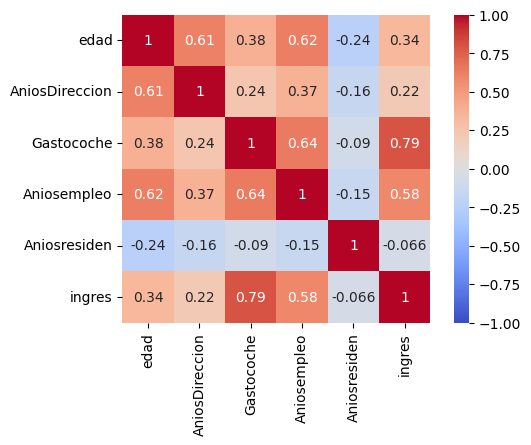

In [ ]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat,vmin=-1,vmax=1,square=True,annot=True,center= 0,cmap='coolwarm') # other params: linewidths=3, linecolor='black'

In [ ]:
# Seleccion de muestras train y test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [ ]:
x = train[['edad','AniosDireccion','Gastocoche','Aniosempleo']]
y = train[['ingres']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

x_scaler = scaler.fit_transform(x)

columnas = x.columns
columnas

Index(['edad', 'AniosDireccion', 'Gastocoche', 'Aniosempleo'], dtype='object')

In [ ]:
X_train_scaled = pd.DataFrame(data = x_scaler, columns = columnas)

X_train_scaled

,edad,AniosDireccion,Gastocoche,Aniosempleo
0,0.610169,0.641509,0.171369,0.203704
1,0.254237,0.150943,0.100313,0.185185
2,0.610169,0.358491,0.727273,0.666667
3,0.322034,0.037736,0.083595,0.166667
4,0.118644,0.075472,0.100313,0.018519
...,...,...,...,...
5183,0.118644,0.075472,0.097179,0.018519
5184,0.559322,0.509434,0.510972,0.203704
5185,0.644068,0.566038,0.762800,0.462963
5186,0.016949,0.000000,0.063741,0.000000


In [ ]:
# definición del modelo lineal
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train_scaled, y)

LinearRegression()

In [ ]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ -8.06275951   3.13856527 241.71284265  62.28153711]]
Intercept:  [-5.70573905]


In [ ]:
regr.score(x,y) # R2

-14498.410990666538

In [ ]:
y_hat= regr.predict(test[['edad','AniosDireccion','Gastocoche','Aniosempleo']])
x = test[['edad','AniosDireccion','Gastocoche','Aniosempleo']]
y = test[['ingres']]
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Puntuación de varianza explicada: 1 es una predicción perfecta
print('R2-score: %.2f' % regr.score(x, y))

Mean absolute error: 7406.15
Residual sum of squares: 84563741.86
R2-score: -13519.30


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Target: Variable que intentamos pronosticar
target_col = "ingres"

# Definicion de variables de estudio
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

#Realizamos una selección de muestra ENTRENAMIENTO Y VALIDACION aletoria y comparables muestras, con
#fines de validar el aprendizaje de nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5120, 5), (1280, 5))

In [ ]:
y_train.shape, y_test.shape

((5120,), (1280,))

In [ ]:
# Correlacion de Pearson!   Recomendado para target numéricos
num_feats = 3

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X_train, y_train, num_feats)
print(str(len(cor_feature)), 'selected features')

2 selected features


In [ ]:
#cor_list.sort(reverse=True)
pd.DataFrame(list(zip(cor_feature[0:num_feats],cor_list[0:num_feats])),columns=['Variable','Importancia']).sort_values('Importancia',ascending=False)

,Variable,Importancia
0,Aniosempleo,0.345246
1,Gastocoche,0.228722


In [ ]:
def indicadores_regresion(y_test,y_pred):
    # Calculamos el Root Mean Square Error: Suma(Y_reales-Y_predichos)^2/n
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Definimos y calculamos el MAPE (mean_absolute_percentage_error)
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return rmse,mape

## MODELO DE REGREIÓN LINEAL

RMSE: 53.56842852143256 - MAPE: 28.56885226073656


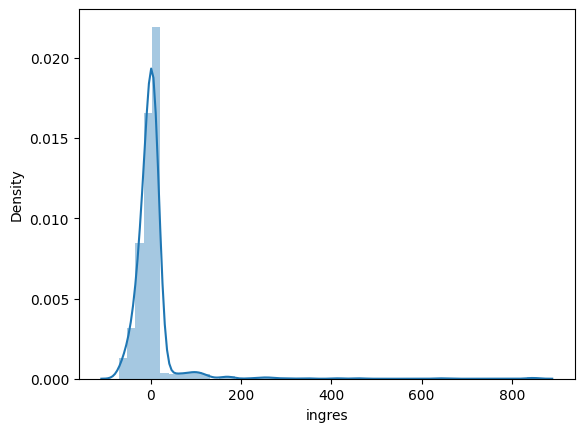

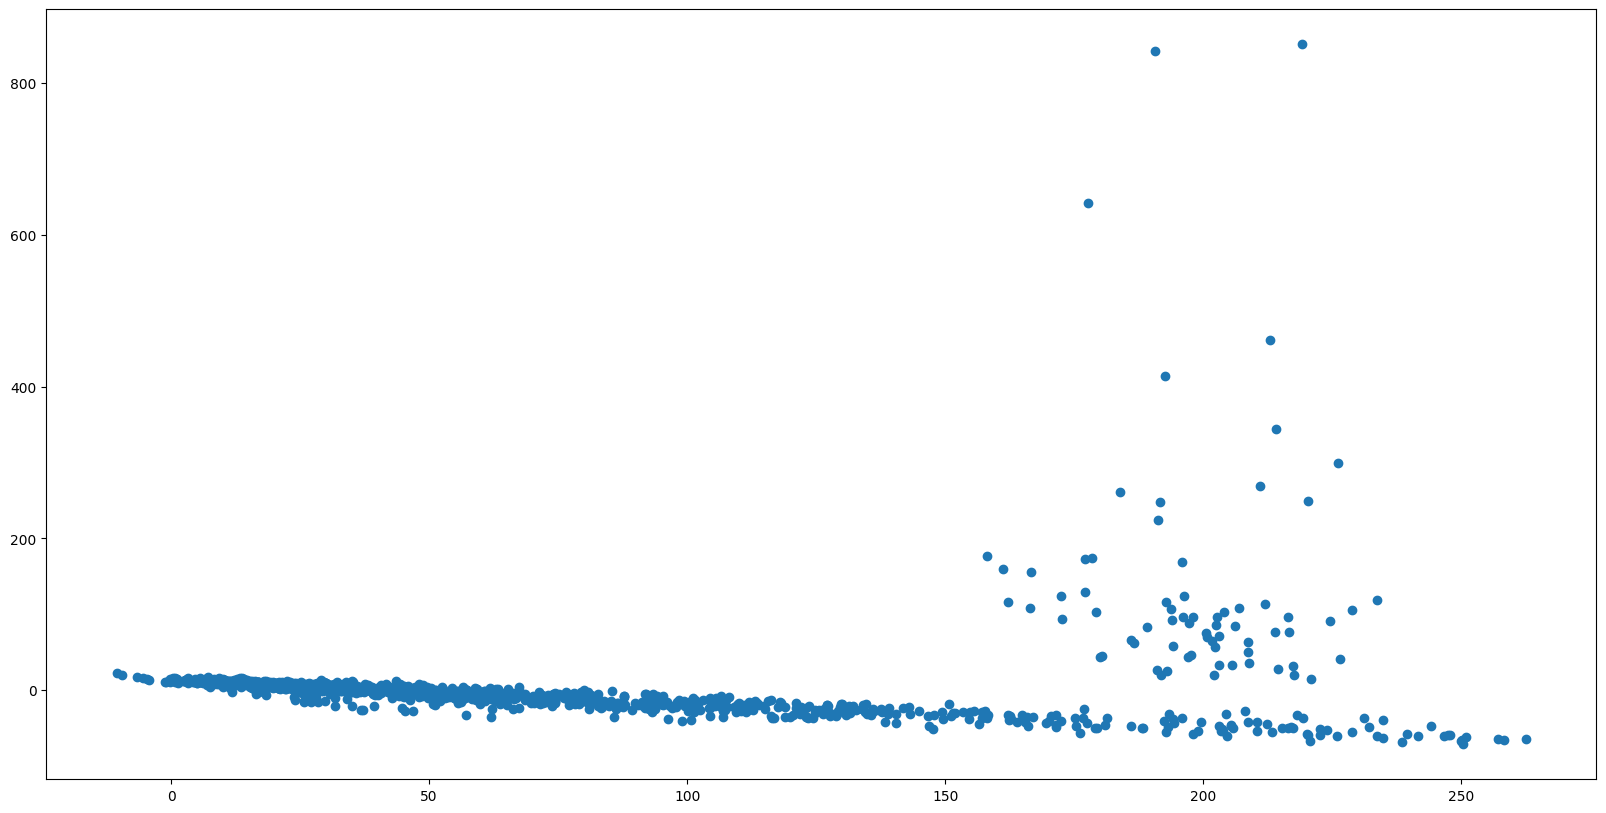

In [ ]:
# Entrenamiento del modelo
model_regression_lineal = LinearRegression()
model_regression_lineal.fit(X_train, y_train)

# Predecir el conjunto de test
y_pred = model_regression_lineal.predict(X_test)
residual = y_test - y_pred

# Mostrar indicadores de precision
rmse, mape = indicadores_regresion(y_test,y_pred)
print(f'RMSE: {rmse} - MAPE: {mape}')

# Gráfico: Validación del Residual como una Distribución Normal
ax = sns.distplot(residual)

# Gráfico: Validación de Homocedasticidad
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_pred, residual)

In [ ]:
# Predicciones test
predicciones = model_regression_lineal.predict(X=X_test)
predicciones = predicciones.flatten()
# Error de test del modelo
Reg_Lineal = np.sqrt(mean_squared_error(y_test,predicciones))
print("")
print(f"El error (rmse) de test es: {Reg_Lineal}")


El error (rmse) de test es: 53.56842852143256


In [ ]:
# R2 del modelo
r2_lineal = np.sqrt(r2_score(y_test,predicciones))
print("")
print(f"El R2 de test es: {r2_lineal}")


El R2 de test es: 0.7702540782794577


In [ ]:
# regression coefficients and R-squared value of model
print(model_regression_lineal.intercept_, model_regression_lineal.coef_, model_regression_lineal.score(X_train, y_train))

-13.799034538762243 [-0.20953942  0.2034184   2.50931657  1.16137601  0.64277201] 0.6493662964193265


In [ ]:
ecuacion_regresion = dict(zip(X_train.columns, model_regression_lineal.coef_))
ecuacion_regresion['INTERCEPTO'] = model_regression_lineal.intercept_
ecuacion_regresion

{'edad': -0.2095394159745318,
 'AniosDireccion': 0.20341840015014734,
 'Gastocoche': 2.5093165731935896,
 'Aniosempleo': 1.16137600751884,
 'Aniosresiden': 0.6427720126933225,
 'INTERCEPTO': -13.799034538762243}

## Modelo de regresión polinómica

RMSE: 51.68659279125147 - MAPE: 18.086637893219034


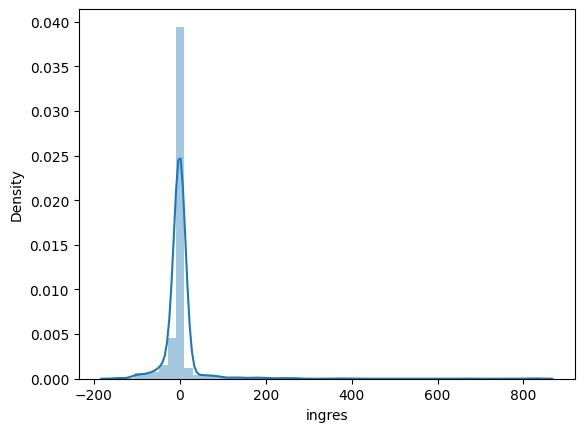

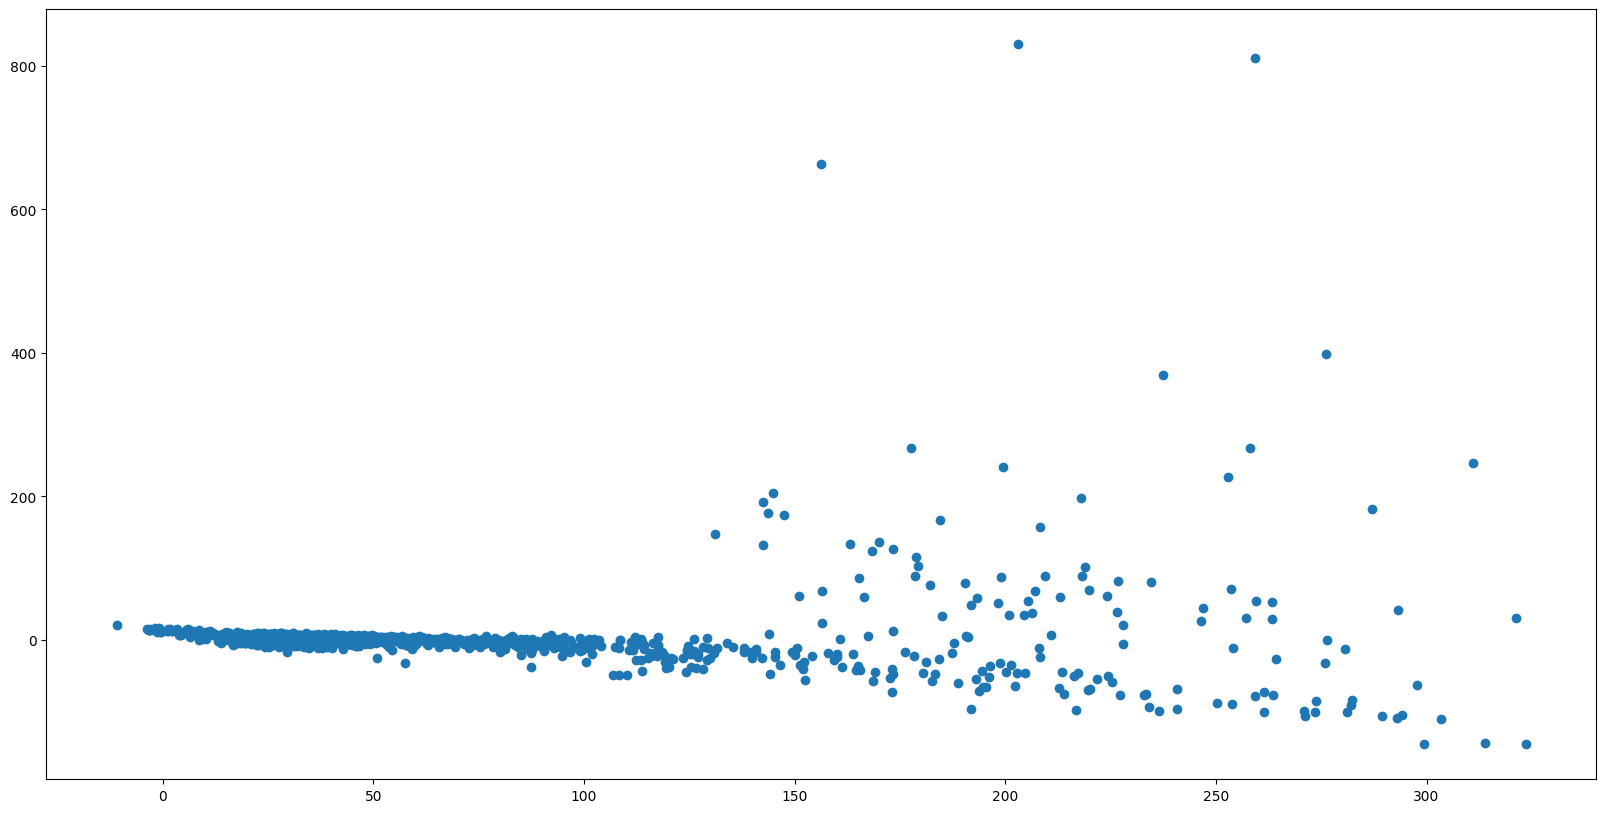

In [ ]:
# Transformación polinómica de datos
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

# Entrenamiento de modelo
model_regression_lineal_transform = LinearRegression()
model_regression_lineal_transform.fit(X_train_poly, y_train)

# Predecir el conjunto de test
y_pred = model_regression_lineal_transform.predict(X_test_poly)
residual = y_test - y_pred

# Mostrar indicadores de precision
rmse, mape = indicadores_regresion(y_test,y_pred)
print(f'RMSE: {rmse} - MAPE: {mape}')

# Gráfico: Validación del Residual como una Distribución Normal
ax = sns.distplot(residual)

# Gráfico: Validación de Homocedasticidad
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_pred, residual)

In [ ]:
# Predicciones test
predicciones = model_regression_lineal_transform.predict(X=X_test_poly)
predicciones = predicciones.flatten()
# Error de test del modelo
Reg_Poli_2 = np.sqrt(mean_squared_error(y_test,predicciones))
print("")
print(f"El error (rmse) de test es: {Reg_Poli_2}")


El error (rmse) de test es: 51.68659279125147


In [ ]:
# R2 del modelo
r2_poli_2 = np.sqrt(r2_score(y_test,predicciones))
print("")
print(f"El R2 de test es: {r2_poli_2}")


El R2 de test es: 0.7882667250349399


## Modelo polinímco de tercer grado

RMSE: 50.61431540299064 - MAPE: 18.610225577487107


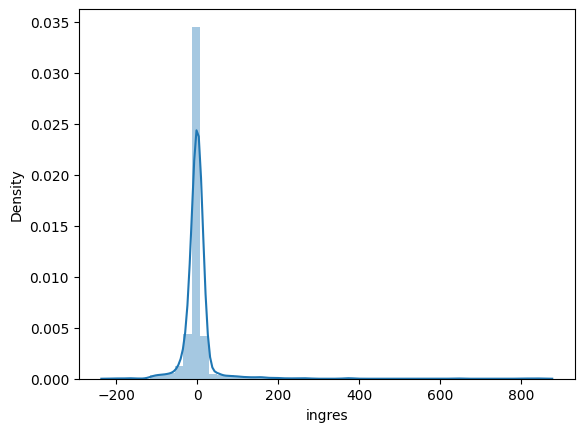

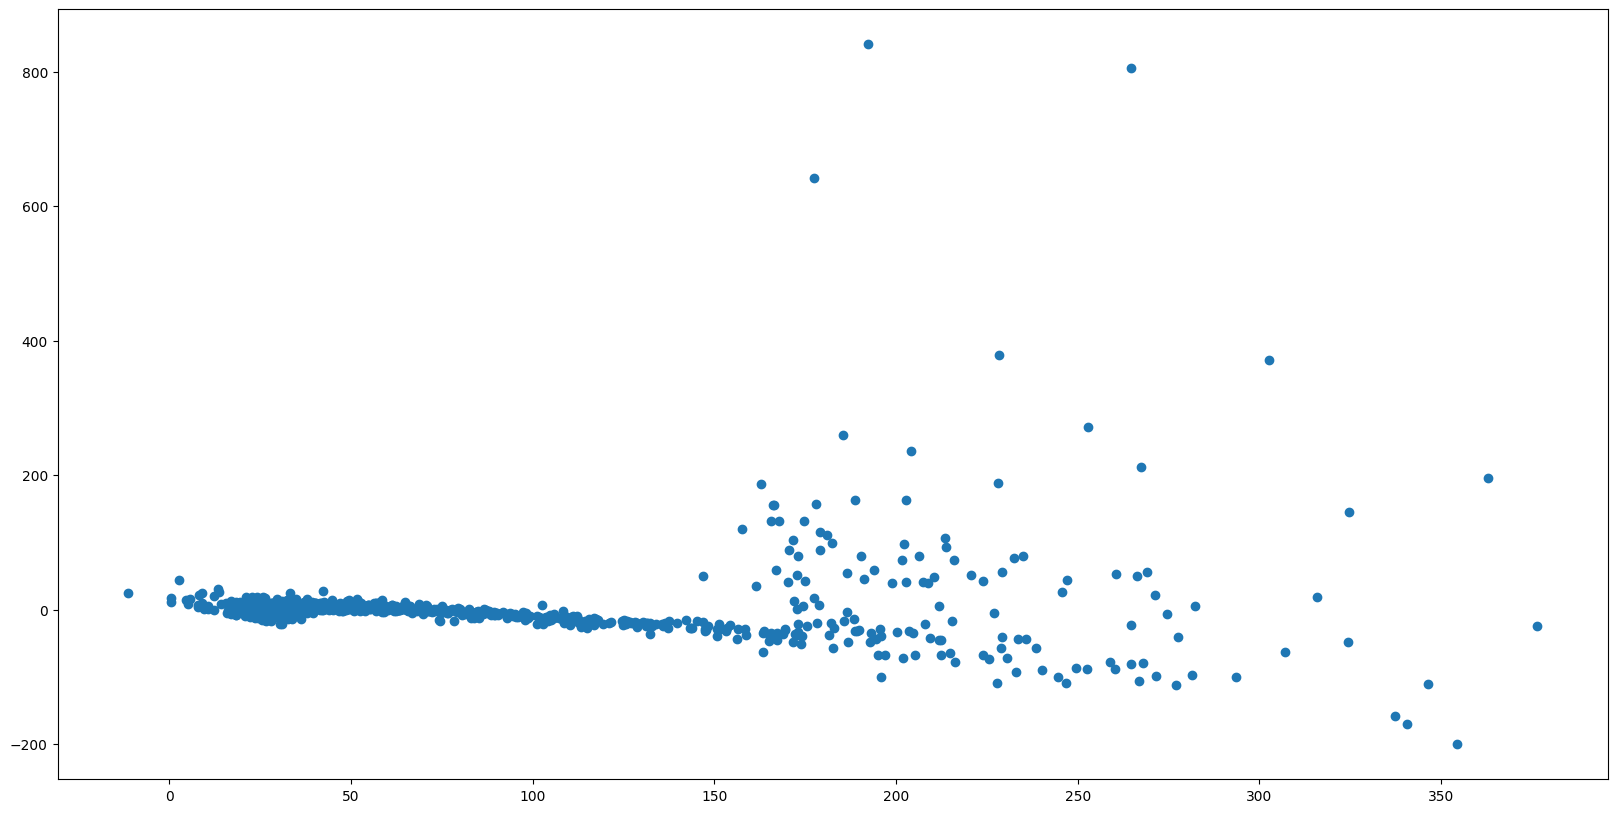

In [ ]:
# Transformación polinómica de datos
poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

# Entrenamiento de modelo
model_regression_lineal_transform = LinearRegression()
model_regression_lineal_transform.fit(X_train_poly, y_train)

# Predecir el conjunto de test
y_pred = model_regression_lineal_transform.predict(X_test_poly)
residual = y_test - y_pred

# Mostrar indicadores de precision
rmse, mape = indicadores_regresion(y_test,y_pred)
print(f'RMSE: {rmse} - MAPE: {mape}')

# Gráfico: Validación del Residual como una Distribución Normal
ax = sns.distplot(residual)

# Gráfico: Validación de Homocedasticidad
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_pred, residual)

In [ ]:
# Predicciones test
predicciones = model_regression_lineal_transform.predict(X=X_test_poly)
predicciones = predicciones.flatten()
# Error de test del modelo
Reg_Poli_3 = np.sqrt(mean_squared_error(y_test,predicciones))
print("")
print(f"El error (rmse) de test es: {Reg_Poli_3}")


El error (rmse) de test es: 50.61431540299064


In [ ]:
# R2 del modelo
r2_poli_3 = np.sqrt(r2_score(y_test,predicciones))
print("")
print(f"El R2 de test es: {r2_poli_3}")


El R2 de test es: 0.7980674355758436


## Modelo polin´mico de cuarto grado

RMSE: 49.63732920819636 - MAPE: 15.610388010703396


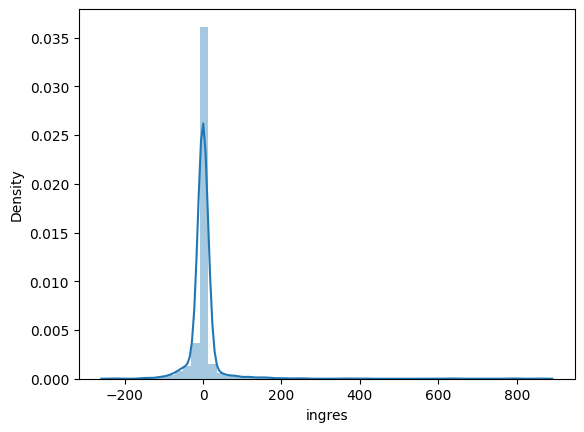

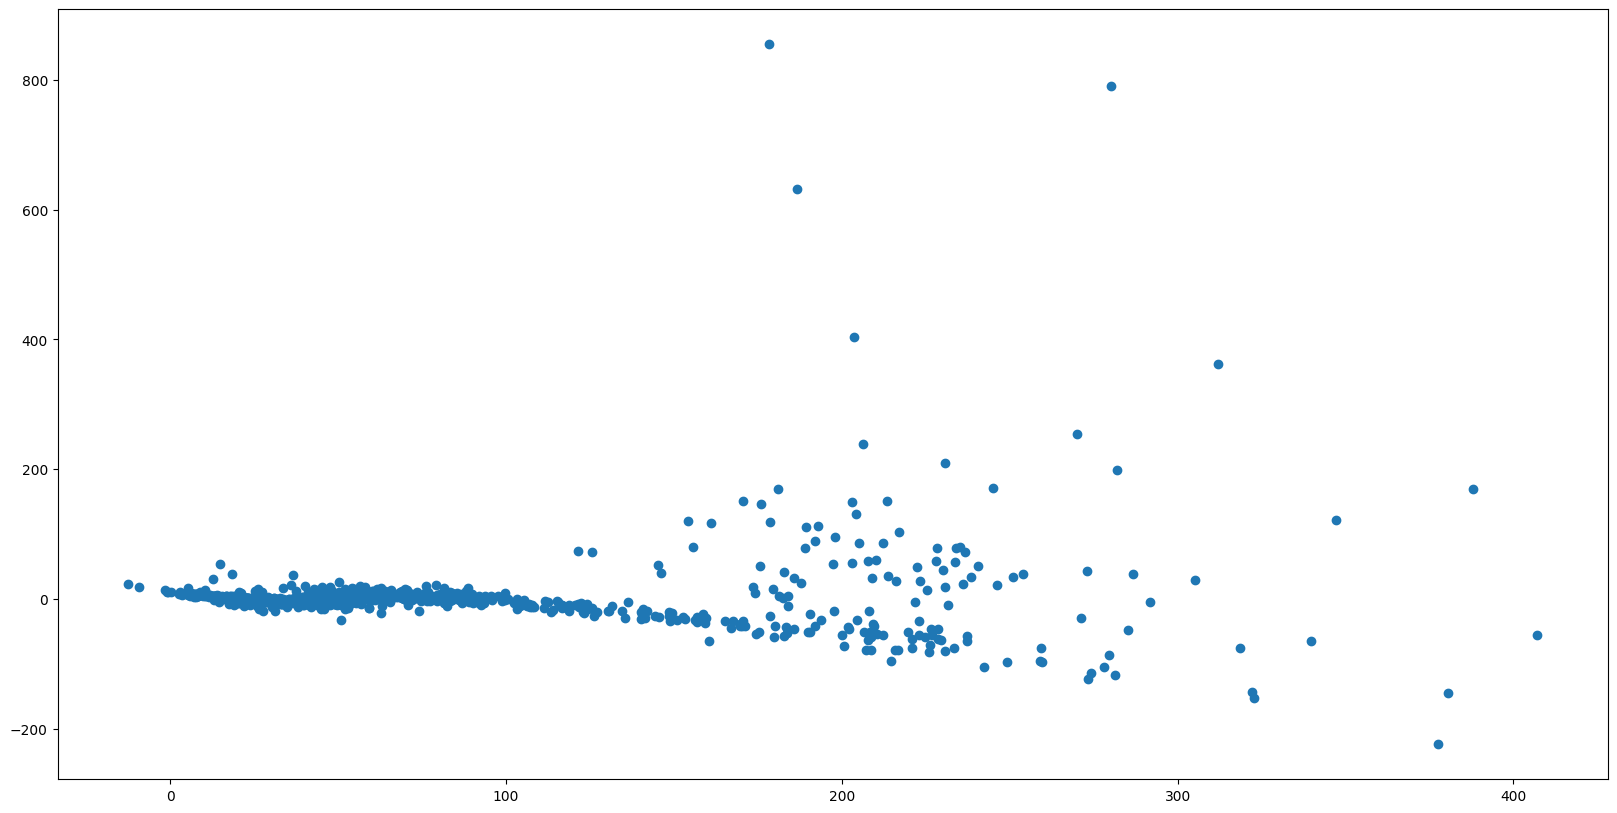

In [ ]:
# Transformación polinómica de datos
poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

# Entrenamiento de modelo
model_regression_lineal_transform = LinearRegression()
model_regression_lineal_transform.fit(X_train_poly, y_train)

# Predecir el conjunto de test
y_pred = model_regression_lineal_transform.predict(X_test_poly)
residual = y_test - y_pred

# Mostrar indicadores de precision
rmse, mape = indicadores_regresion(y_test,y_pred)
print(f'RMSE: {rmse} - MAPE: {mape}')

# Gráfico: Validación del Residual como una Distribución Normal
ax = sns.distplot(residual)

# Gráfico: Validación de Homocedasticidad
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_pred, residual)

In [ ]:
# R-squared value of model
model_regression_lineal_transform.score(X_train_poly, y_train)

0.7410807898959209

In [ ]:
# Predicciones test
predicciones = model_regression_lineal_transform.predict(X=X_test_poly)
predicciones = predicciones.flatten()
# Error de test del modelo
Reg_Poli_4 = np.sqrt(mean_squared_error(y_test,predicciones))
print("")
print(f"El error (rmse) de test es: {Reg_Poli_4}")


El error (rmse) de test es: 49.63732920819636


In [ ]:
# R2 del modelo
r2_poli_4 = np.sqrt(r2_score(y_test,predicciones))
print("")
print(f"El R2 de test es: {r2_poli_4}")


El R2 de test es: 0.8067176853140757


## Modelo de regresión multiple

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_test, y_test)

LinearRegression()

In [ ]:
regr.intercept_

-31.731924757048546

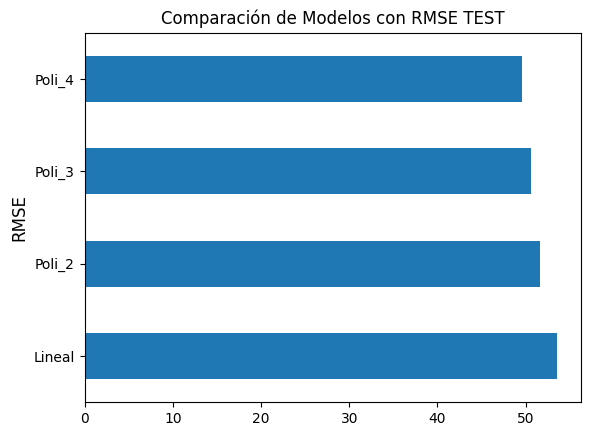

In [ ]:
# Comparamos los 4 modelos
df_comparacion1 = pd.DataFrame({
                    'modelo': ['Lineal', 'Poli_2', 'Poli_3', 'Poli_4'],
                    'test rmse': [Reg_Lineal, Reg_Poli_2, Reg_Poli_3, Reg_Poli_4]
                 })
ax = df_comparacion1.set_index('modelo').plot(kind="barh",title="Comparación de Modelos con RMSE TEST")
ax.set_ylabel("RMSE", fontsize="large")
ax.get_legend().remove()

In [ ]:
df_comparacion1.sort_values('test rmse',ascending=False)

,modelo,test rmse
0,Lineal,53.568429
1,Poli_2,51.686593
2,Poli_3,50.614315
3,Poli_4,49.637329


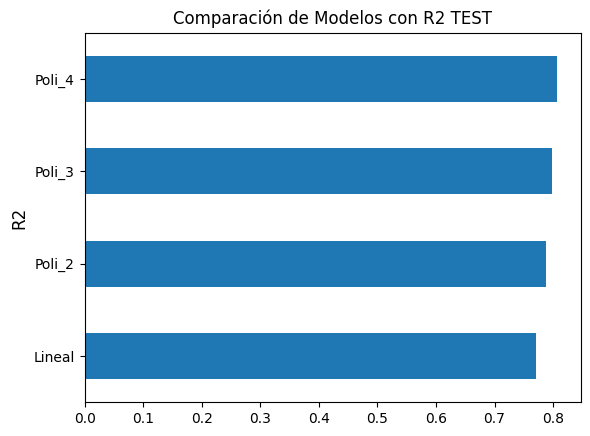

In [ ]:
# Comparamos los 4 modelos
df_comparacion2 = pd.DataFrame({
                    'modelo': ['Lineal', 'Poli_2', 'Poli_3', 'Poli_4'],
                    'test r2': [r2_lineal, r2_poli_2, r2_poli_3, r2_poli_4]
                 })
ax = df_comparacion2.set_index('modelo').plot(kind="barh",title="Comparación de Modelos con R2 TEST")
ax.set_ylabel("R2", fontsize="large")
ax.get_legend().remove()

In [ ]:
df_comparacion2.sort_values('test r2',ascending=False)

,modelo,test r2
3,Poli_4,0.806718
2,Poli_3,0.798067
1,Poli_2,0.788267
0,Lineal,0.770254
